In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Gráficos interactivos
import plotly.io as pio
import plotly.express as px

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

In [5]:
airpassengers= pd.read_csv('data/AirPassengers.csv')
airpassengers.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [6]:
airpassengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
airpassengers['TravelDate']=pd.to_datetime(airpassengers['TravelDate'])
airpassengers.dtypes

TravelDate    datetime64[ns]
Passengers             int64
dtype: object

In [9]:
airpassengers=airpassengers.set_index('TravelDate')
airpassengers.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
airpassengerspx=airpassengers.reset_index() #Plotly necesita la fecha en una columna, no vale el índice
px.line(airpassengerspx, x='TravelDate', y='Passengers')

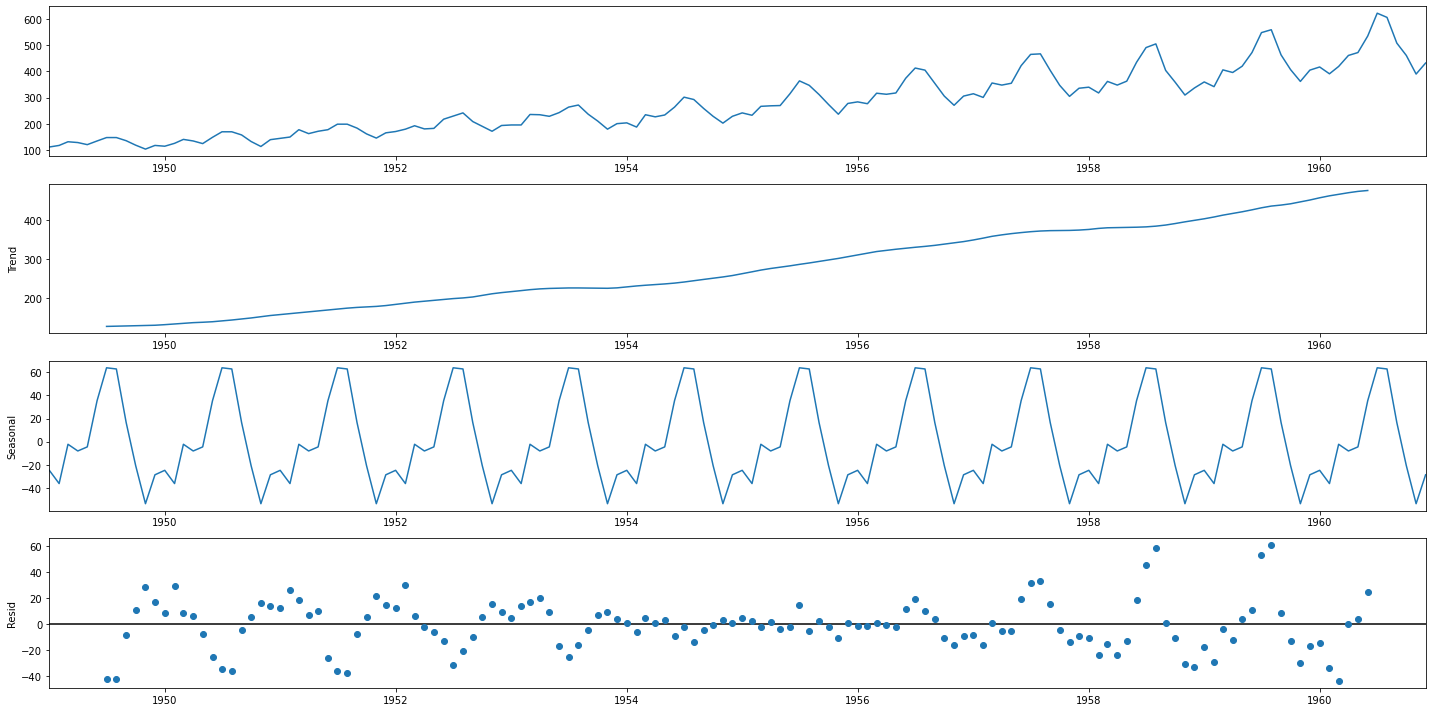

In [13]:
plt.rcParams['figure.figsize']=(20,10)

decomposition=sm.tsa.seasonal_decompose(airpassengers)
decomposition.plot();

El primer gráfico nos muestra la observación. EL segundo la tendencia, sin tener en cuenta la estacionalidad.
El 3r gráfico nos enseña la estacionalidad, sin tener en cuenta ni el error ni la tendencia (vemos las estaciones muy marcadas siempre iguales).
Por último graficamos el error (todas aquellas muestran que se marchan de lo normal)

In [17]:
#ADF Test
result = adfuller (airpassengers.Passengers, autolag='AIC')
print(f'ADF Statistic:{result [0]}')
print(f'ADF p-value:{result [1]}')


ADF Statistic:0.8153688792060472
ADF Statistic:0.991880243437641


In [19]:
result = kpss (airpassengers.Passengers, regression='c')
print(f'KPSS Statistic:{result [0]}')
print(f'KPSS p-value:{result [1]}')

KPSS Statistic:1.6513122354165206
KPSS p-value:0.01


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




En el ADF no rechazamos la hipotesis nula (= no estacional), por lo tanto, no es estacional.
Lo mismo pasa en el KPSS, en este caso rechazamos la H0, por lo que tambien nos quedamos con que no es estacional